# KNN

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets
import pandas as pd

#导入数据
data=pd.read_excel(r'D:\data\联川\抗栓聚类.xlsx')

iris_X = data.drop(["编号","Assay","结局"],axis=1)
iris_Y = data["结局"]

#将数据分成训练集和测试集，比例为：80%和20%
#iris_train_X , iris_test_X, iris_train_Y ,iris_test_Y = train_test_split(iris_X, iris_Y, test_size=0,random_state=0)
iris_train_X ,iris_train_Y=iris_X, iris_Y

#设置KNN算法的参数
KNN =KNeighborsClassifier(algorithm='auto', #在KNN中使用的算法，其他选项还有ball_tree，kd_tree，和brute
                         # leaf_size=30,   #当使用和树有关的算法时的叶子数量
                          metric='minkowski',p=2, #使用的是明可夫斯基距离中的欧式距离
                          metric_params=None,
                          n_jobs=1,  #并行计算的线程数量
                          n_neighbors=1, #分成5类（默认）
                          weights='uniform' #距离计算中使用的权重，distance表示按照距离的倒数加权，uniform表示各样本权重相同
                          )
#将KNN算法应用在训练集上
KNN.fit(iris_train_X, iris_train_Y)

#将结果应用于测试集中
predict = KNN.predict(iris_X)
print(predict)

#计算模型的正确率
#print(KNN.score(iris_test_X, iris_test_Y))
print(KNN.score(iris_X, iris_Y))

#正确率为100%             
# 计算每个样本的k个最近邻
distances, indices = KNN.kneighbors(X)

# 计算每个特征的贡献度
feature_contributions = np.mean(distances[:, 1:], axis=0)
feature_contributions

[1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1.0


C:\Users\C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([], dtype=float64)

In [57]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# 创建示例数据
X = np.array(iris_X)

# 创建kNN模型
k = 2
knn = NearestNeighbors(n_neighbors=k+1)
knn.fit(X)

# 计算每个样本的k个最近邻
distances, indices = knn.kneighbors(X)

# 计算每个特征的贡献度
feature_contributions = np.mean(distances[:, 1:], axis=0)

# 获取特征名称
feature_names = iris_X.columns

# 组合特征名称和贡献度，并按贡献度进行排序
sorted_contributions = sorted(zip(feature_names, feature_contributions), key=lambda s: abs(s[1]), reverse=True)

# 输出排序后的特征贡献度
for feature, contribution in sorted_contributions:
    print(f"{feature[i]}: {contribution}")

MEPE: 10.33674370411682
NT-proBNP: 9.80855851483664


In [59]:
feature_contributions

array([ 9.80855851, 10.3367437 ])

In [45]:
from sklearn.feature_selection import SelectKBest, f_classif
# 使用选择K个最佳特征的方法评估特征重要性
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(iris_train_X, iris_train_Y)

# 获取特征重要性得分
feature_scores = selector.scores_
#feature_names = data.feature_names

# 打印每个特征的重要性得分
#for i, score in enumerate(feature_scores):
#    print(f"Feature {feature_names[i]}: {score}")
sorted([*zip(iris_train_X.columns,feature_scores.ravel())],key=lambda s:abs(s[1]),reverse=True)

[('NT-proBNP', 25.402215225781173),
 ('GDF-15', 12.667741179332532),
 ('CTSD', 11.787127847006365),
 ('TNF-R1', 10.581677529120855),
 ('OPG', 8.883211093384467),
 ('PAI', 8.632302695347374),
 ('U-PAR', 7.686733128344791),
 ('TIMD4', 7.669765958643756),
 ('NID1', 7.527260121468301),
 ('TNC', 7.510725729154876),
 ('VCAM1', 7.444502001597922),
 ('IGFBP-1', 7.3542570966470295),
 ('ST2', 7.294911750001566),
 ('TIMP1', 6.924081909874037),
 ('OPN', 6.790206479955231),
 ('Notch 3', 6.728088598250967),
 ('SERPINA5', 6.187781460409439),
 ('CHI3L1', 6.051366321167322),
 ('IGFBP-2', 5.834472529188377),
 ('TNFRSF14', 5.398654139265329),
 ('IGFBP-7', 5.026187364818454),
 ('LILRB1', 4.988410633073791),
 ('TNF-R2', 4.939220591671619),
 ('LILRB2', 4.869668217497625),
 ('TNFSF13B', 4.865324323194635),
 ('CCL15', 4.810832152698034),
 ('FABP4', 4.698657307410444),
 ('Gal-4', 4.625923994564629),
 ('PSP-D', 4.374785008401703),
 ('TIMP4', 4.349565022179244),
 ('SCGB3A2', 4.348050542003344),
 ('t-PA', 4.30176

In [13]:
len(predict)

83

In [16]:
1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

SyntaxError: invalid syntax (3179907807.py, line 1)

# KMeans聚类

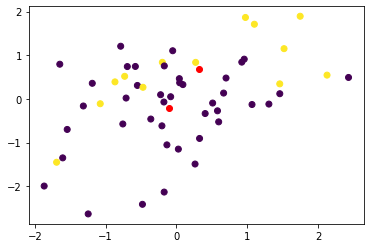

In [46]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# 创建数据集
X = np.array(iris_X)
X = StandardScaler().fit_transform(X)

# 设置聚类中心的个数
k = 2

# 创建 K-means 聚类模型
model = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=5, random_state=0)

# 训练模型
model.fit(X)

# 获取聚类中心
centroids = model.cluster_centers_

# 获取聚类标签
labels = model.labels_

# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.plot(centroids[:, 0], centroids[:, 1], 'ro')
plt.show()

In [49]:
# 获取聚类中心
centroids = model.cluster_centers_

# 获取每个特征的贡献度
feature_contributions = centroids.std(axis=0)

sorted([*zip(iris_X.columns,feature_contributions.ravel())],key=lambda s:abs(s[1]),reverse=True)

[('CDH1', 0.8437025683192623),
 ('CD46', 0.7819867220615695),
 ('VASN', 0.7661081248770003),
 ('COL18A1', 0.7612358641547197),
 ('CCL14', 0.7538499044211749),
 ('DEFA1', 0.7509225757219997),
 ('IGFBP6', 0.7351712127227401),
 ('CST3', 0.7119519700096959),
 ('NOTCH1', 0.692649487284408),
 ('MET', 0.6876279942042203),
 ('EFEMP1', 0.6792653560376494),
 ('CHL1', 0.6748964542461948),
 ('LCN2', 0.6740776584964732),
 ('PAM', 0.6680395444031),
 ('PTPRS', 0.6607483711584212),
 ('ENG', 0.6531126071273059),
 ('ANGPTL3', 0.6449121653124104),
 ('TIE1', 0.6420388276368851),
 ('PRSS2', 0.6292613964749947),
 ('VCAM1', 0.62374844429812),
 ('GAS6', 0.6211181327871238),
 ('TCN2', 0.6186239448907747),
 ('F7', 0.6163749069715379),
 ('FETUB', 0.6143412640566239),
 ('TNF-R2', 0.6096845646339661),
 ('LTBR', 0.6089164540719403),
 ('CD59', 0.6030343553442463),
 ('TNFRSF14', 0.599653854120886),
 ('TNXB', 0.5972970479063706),
 ('TIMP1', 0.5868473477955343),
 ('CFHR5', 0.5839601981330389),
 ('AOC3', 0.5794525045509

In [37]:
labels

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [44]:
1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0

,NUDT4B,GATD3,PNMA6E,GNG5B,RBM47,UBA6,ESYT2,SHTN1,PXDNL,ILVBL,...,MAP3K4,FCGBP,SCIN,DDX49,CAPN7,WASF2,ENPP4,ZHX2,MORC2,SEC23IP
0,14.994468,17.029947,10.191720,14.554663,13.288476,13.302012,13.678255,13.968009,9.661755,14.288540,...,7.834753,9.679496,13.054631,9.565768,9.773173,12.287026,10.989934,7.550078,7.999047,14.397437
1,11.365080,16.595323,11.161167,13.887825,13.584323,13.106890,13.027500,15.097016,9.327594,11.616298,...,10.043751,8.960945,15.153337,8.243856,7.036269,12.088939,10.839654,7.281680,8.086608,14.123969
2,12.764505,16.691674,9.626638,12.775391,11.364397,13.582434,13.302294,12.760103,9.387123,13.565419,...,10.130882,11.781685,12.083766,11.020019,7.627432,12.170361,12.427336,7.791581,7.838776,13.966056
3,13.410124,16.515422,9.816774,12.986925,13.642911,14.303919,14.100802,14.794133,9.487537,14.305990,...,9.841478,10.665587,13.768754,6.904191,9.850194,12.582750,11.384157,7.544645,8.318033,14.457880
4,15.216194,17.102956,10.272802,15.190582,14.267815,14.454229,13.127873,14.154708,8.608250,14.548722,...,10.078447,5.624982,11.231834,7.633635,10.799414,12.197753,10.745973,8.006437,8.429863,13.450929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,12.845241,16.760013,9.390832,14.088228,13.836331,14.981259,13.847722,14.332344,9.324225,14.179595,...,9.601205,8.304423,10.616789,10.012385,9.587139,12.901601,10.897353,7.596355,8.002160,14.231772
79,12.468073,16.572561,9.859047,11.548412,14.157178,14.311247,13.874043,14.434361,8.467390,14.435078,...,9.547740,6.821869,12.004843,9.311037,10.779987,12.783986,12.356656,7.880942,5.629748,14.483885
80,13.407113,16.257056,9.628774,13.569776,12.867146,14.429394,13.166563,13.551753,8.763600,13.686702,...,6.935712,7.835211,10.091244,9.590503,10.110283,13.130935,11.024167,8.350280,8.014576,14.172304
81,13.583281,16.509967,10.499055,13.734398,13.538381,15.205019,13.862640,14.081659,10.809832,14.223045,...,8.506622,10.899416,7.994684,9.382175,10.286497,13.323238,13.060302,7.671554,8.129856,14.318779


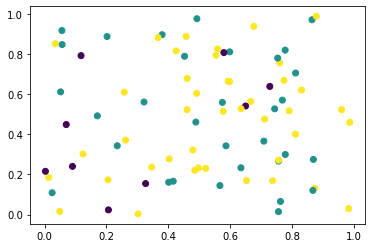

In [40]:
import numpy as np
from sklearn.cluster import KMeans

# 创建数据集
X = np.random.rand(83, 5945)

# 创建 K-means 模型
model = KMeans(n_clusters=3)

# 训练模型
model.fit(X)

# 获取聚类结果
labels = model.labels_

# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

# 层次聚类

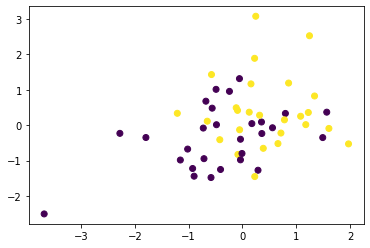

In [29]:
from sklearn.cluster import AgglomerativeClustering

# 创建数据集
X =np.array(iris_X) 
X = StandardScaler().fit_transform(X)

# 创建层次聚类模型
model = AgglomerativeClustering(n_clusters=2,linkage="ward",affinity="euclidean")

# 训练模型
model.fit(X)

# 获取聚类结果
labels = model.labels_

# 绘制聚类结果
plt.scatter(X[:, 3], X[:, 47], c=labels)
plt.show()

In [52]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

# 加载示例数据集
X =np.array(iris_X)
feature_names = iris_X.columns

# 计算特征的相似性矩阵
dist_matrix = linkage(X, method='ward')

# 进行层次聚类
clusters = fcluster(dist_matrix, t=3, criterion='maxclust')

# 计算每个特征在不同簇中的平均值
feature_means = []
for feature in range(X.shape[1]):
    feature_values = X[:, feature]
    feature_means.append([np.mean(feature_values[clusters == i]) for i in np.unique(clusters)])

# 计算特征贡献度
feature_contributions = np.std(feature_means, axis=1)

# 输出每个特征的贡献度
for i, contribution in enumerate(feature_contributions):
    print(f"Feature {feature_names[i]}: {contribution}")

Feature NT-proBNP: 2.4712336536880013
Feature MEPE: 1.369943256332094
Feature TNFRSF14: 1.1500117470968296
Feature LDL receptor: 1.471186587439107
Feature ITGB2: 1.273636048035876
Feature IL-17RA: 0.9472381773953884
Feature TNF-R2: 1.2911477551829997
Feature MMP-9: 0.3697021032087341
Feature EPHB4: 1.2650855236552725
Feature IL2-RA: 1.0916204047292677
Feature OPG: 1.2985139956688543
Feature ALCAM: 1.2631105179294777
Feature TFF3: 1.6325363729101228
Feature SELP: 1.6437826123897215
Feature CSTB: 1.7267295817430903
Feature MCP-1: 1.3388074508071284
Feature CD163: 1.5397671536735882
Feature Gal-3: 1.3934562801976875
Feature GRN: 1.1756975802576928
Feature BLM hydrolase: 1.2996397847829024
Feature PLC: 1.2269130601724032
Feature LTBR: 0.8910614065656017
Feature Notch 3: 1.1709823639281274
Feature TIMP4: 0.9597409935358088
Feature CNTN1: 1.034396956751598
Feature CDH5: 0.908733402329394
Feature TLT-2: 1.0649762396753812
Feature FABP4: 2.1579728599301755
Feature TFPI: 1.4598671007133082
Feat

In [30]:
labels

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [ ]:
0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1

# 密度聚类

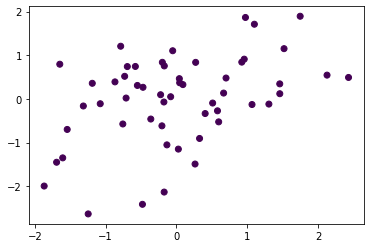

In [21]:
from sklearn.cluster import DBSCAN

# 创建数据集
X = np.array(iris_X) 
X = StandardScaler().fit_transform(X)

# 创建密度聚类模型
model = DBSCAN(min_samples=2)#eps=0.0001, min_samples=5

# 训练模型
model.fit(X)

# 获取聚类结果
labels = model.labels_

# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

In [53]:
import numpy as np
from sklearn.cluster import DBSCAN

# 加载示例数据集
X = np.array(iris_X)
feature_names = iris_X.columns

# 创建密度聚类模型
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# 获取每个样本的簇标签
labels = dbscan.labels_

# 计算每个特征在不同簇中的平均值
feature_means = []
for feature in range(X.shape[1]):
    feature_values = X[:, feature]
    feature_means.append([np.mean(feature_values[labels == i]) for i in np.unique(labels)])

# 计算特征贡献度
feature_contributions = np.std(feature_means, axis=1)

# 输出每个特征的贡献度
for i, contribution in enumerate(feature_contributions):
    print(f"Feature {feature_names[i]}: {contribution}")

Feature NT-proBNP: 0.0
Feature MEPE: 0.0
Feature TNFRSF14: 0.0
Feature LDL receptor: 0.0
Feature ITGB2: 0.0
Feature IL-17RA: 0.0
Feature TNF-R2: 0.0
Feature MMP-9: 0.0
Feature EPHB4: 0.0
Feature IL2-RA: 0.0
Feature OPG: 0.0
Feature ALCAM: 0.0
Feature TFF3: 0.0
Feature SELP: 0.0
Feature CSTB: 0.0
Feature MCP-1: 0.0
Feature CD163: 0.0
Feature Gal-3: 0.0
Feature GRN: 0.0
Feature BLM hydrolase: 0.0
Feature PLC: 0.0
Feature LTBR: 0.0
Feature Notch 3: 0.0
Feature TIMP4: 0.0
Feature CNTN1: 0.0
Feature CDH5: 0.0
Feature TLT-2: 0.0
Feature FABP4: 0.0
Feature TFPI: 0.0
Feature PAI: 0.0
Feature CCL24: 0.0
Feature TR: 0.0
Feature TNFRSF10C: 0.0
Feature GDF-15: 0.0
Feature SELE: 0.0
Feature AZU1: 0.0
Feature DLK-1: 0.0
Feature SPON1: 0.0
Feature MPO: 0.0
Feature CXCL16: 0.0
Feature IL-6RA: 0.0
Feature RETN: 0.0
Feature IGFBP-1: 0.0
Feature CHIT1: 0.0
Feature TR-AP: 0.0
Feature PSP-D: 0.0
Feature PI3: 0.0
Feature Ep-CAM: 0.0
Feature AP-N: 0.0
Feature AXL: 0.0
Feature IL-1RT1: 0.0
Feature MMP-2: 0.0


In [22]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [ ]:
-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1